In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_all.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_all.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_all.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_all.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 42), (4499, 1), (4233, 43), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [6]:
X_test = X_test.iloc[:,1:43]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],42, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=128,activation='relu',
         return_sequences=True,
         input_shape=(40,1)
     ),
     tf.keras.layers.LSTM(
         units=64,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=32,
         activation='relu'
     ),

     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_all=model.fit(X_train, y_train, batch_size=256, epochs=250, validation_data=(X_test, y_test))

Train...
Epoch 1/250
18/18 [==============================] - 5s 151ms/step - loss: 2.3033 - accuracy: 0.1329 - val_loss: 2.2392 - val_accuracy: 0.1236
Epoch 2/250
18/18 [==============================] - 2s 129ms/step - loss: 2.2132 - accuracy: 0.1574 - val_loss: 2.1988 - val_accuracy: 0.1488
Epoch 3/250
18/18 [==============================] - 2s 132ms/step - loss: 2.1774 - accuracy: 0.1952 - val_loss: 2.1971 - val_accuracy: 0.1758
Epoch 4/250
18/18 [==============================] - 2s 129ms/step - loss: 2.1179 - accuracy: 0.2098 - val_loss: 2.1581 - val_accuracy: 0.1906
Epoch 5/250
18/18 [==============================] - 2s 128ms/step - loss: 2.0675 - accuracy: 0.2303 - val_loss: 2.1322 - val_accuracy: 0.1991
Epoch 6/250
18/18 [==============================] - 3s 144ms/step - loss: 2.0234 - accuracy: 0.2441 - val_loss: 2.1341 - val_accuracy: 0.2268
Epoch 7/250
18/18 [==============================] - 3s 166ms/step - loss: 1.9835 - accuracy: 0.2745 - val_loss: 2.0979 - val_accurac

18/18 [==============================] - 5s 292ms/step - loss: 1.8332 - accuracy: 0.3494 - val_loss: 2.0140 - val_accuracy: 0.2908
Epoch 52/250
18/18 [==============================] - 5s 283ms/step - loss: 1.7890 - accuracy: 0.3599 - val_loss: 2.0195 - val_accuracy: 0.3154
Epoch 53/250
18/18 [==============================] - 5s 276ms/step - loss: 1.7329 - accuracy: 0.3765 - val_loss: 1.9974 - val_accuracy: 0.3286
Epoch 54/250
18/18 [==============================] - 5s 297ms/step - loss: 1.7159 - accuracy: 0.3694 - val_loss: 2.0058 - val_accuracy: 0.3111
Epoch 55/250
18/18 [==============================] - 5s 299ms/step - loss: 1.6905 - accuracy: 0.3905 - val_loss: 2.0257 - val_accuracy: 0.2910
Epoch 56/250
18/18 [==============================] - 5s 286ms/step - loss: 1.6592 - accuracy: 0.3945 - val_loss: 2.0245 - val_accuracy: 0.3092
Epoch 57/250
18/18 [==============================] - 5s 301ms/step - loss: 1.6357 - accuracy: 0.4099 - val_loss: 2.0840 - val_accuracy: 0.3272
Epoch

Epoch 108/250
18/18 [==============================] - 6s 352ms/step - loss: 1.1082 - accuracy: 0.6132 - val_loss: 1.9992 - val_accuracy: 0.4129
Epoch 109/250
18/18 [==============================] - 6s 336ms/step - loss: 1.1060 - accuracy: 0.6059 - val_loss: 2.0170 - val_accuracy: 0.4118
Epoch 110/250
18/18 [==============================] - 6s 363ms/step - loss: 1.0873 - accuracy: 0.6159 - val_loss: 2.0718 - val_accuracy: 0.4103
Epoch 111/250
18/18 [==============================] - 6s 332ms/step - loss: 1.0663 - accuracy: 0.6239 - val_loss: 2.0375 - val_accuracy: 0.4255
Epoch 112/250
18/18 [==============================] - 6s 334ms/step - loss: 1.0538 - accuracy: 0.6328 - val_loss: 2.0472 - val_accuracy: 0.4106
Epoch 113/250
18/18 [==============================] - 7s 371ms/step - loss: 1.0731 - accuracy: 0.6261 - val_loss: 2.1885 - val_accuracy: 0.4144
Epoch 114/250
18/18 [==============================] - 6s 337ms/step - loss: 1.0810 - accuracy: 0.6235 - val_loss: 2.0247 - val_ac

18/18 [==============================] - 6s 350ms/step - loss: 0.8560 - accuracy: 0.7070 - val_loss: 2.1197 - val_accuracy: 0.4359
Epoch 165/250
18/18 [==============================] - 6s 354ms/step - loss: 0.8488 - accuracy: 0.7106 - val_loss: 2.1025 - val_accuracy: 0.4155
Epoch 166/250
18/18 [==============================] - 6s 339ms/step - loss: 0.8345 - accuracy: 0.7139 - val_loss: 2.0545 - val_accuracy: 0.4290
Epoch 167/250
18/18 [==============================] - 6s 363ms/step - loss: 0.8305 - accuracy: 0.7170 - val_loss: 2.1817 - val_accuracy: 0.4122
Epoch 168/250
18/18 [==============================] - 6s 339ms/step - loss: 0.8280 - accuracy: 0.7210 - val_loss: 2.0632 - val_accuracy: 0.4418
Epoch 169/250
18/18 [==============================] - 6s 338ms/step - loss: 0.8248 - accuracy: 0.7186 - val_loss: 2.1528 - val_accuracy: 0.4352
Epoch 170/250
18/18 [==============================] - 7s 373ms/step - loss: 0.8960 - accuracy: 0.6944 - val_loss: 2.2348 - val_accuracy: 0.4044

18/18 [==============================] - 6s 335ms/step - loss: 0.6431 - accuracy: 0.7808 - val_loss: 2.5851 - val_accuracy: 0.4290
Epoch 221/250
18/18 [==============================] - 6s 343ms/step - loss: 0.6450 - accuracy: 0.7833 - val_loss: 2.5572 - val_accuracy: 0.4437
Epoch 222/250
18/18 [==============================] - 6s 353ms/step - loss: 0.6239 - accuracy: 0.7913 - val_loss: 2.5678 - val_accuracy: 0.4356
Epoch 223/250
18/18 [==============================] - 6s 334ms/step - loss: 0.6025 - accuracy: 0.7902 - val_loss: 2.5459 - val_accuracy: 0.4264
Epoch 224/250
18/18 [==============================] - 7s 382ms/step - loss: 0.5979 - accuracy: 0.7982 - val_loss: 2.6171 - val_accuracy: 0.4177
Epoch 225/250
18/18 [==============================] - 6s 339ms/step - loss: 0.5983 - accuracy: 0.7960 - val_loss: 2.6462 - val_accuracy: 0.4132
Epoch 226/250
18/18 [==============================] - 6s 333ms/step - loss: 0.6432 - accuracy: 0.7886 - val_loss: 2.5405 - val_accuracy: 0.4491

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 7s 36ms/step - loss: 2.7962 - accuracy: 0.4021
Pre-training accuracy: 40.2079%


In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.741053581237793
Testing Accuracy:  0.40207889676094055


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.40207889676094055


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[4 3 4 ... 9 9 9]


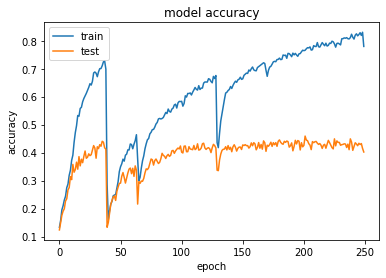

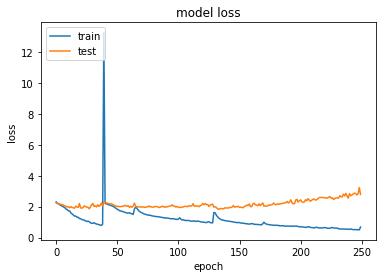

In [14]:
# summarize history for accuracy
plt.plot(model_all.history['accuracy'])
plt.plot(model_all.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_all.history['loss'])
plt.plot(model_all.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
train_hist = pd.DataFrame(model_all.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.303259,0.132918,2.239213,0.123553
1,2.213161,0.157368,2.198771,0.148831
2,2.177426,0.195154,2.197070,0.175762
3,2.117865,0.209824,2.158057,0.190645
4,2.067457,0.230273,2.132161,0.199150
...,...,...,...,...
245,0.519599,0.821960,2.848563,0.433262
246,0.500158,0.828629,2.757166,0.428774
247,0.517859,0.818849,2.823462,0.432317
248,0.494622,0.830184,3.232155,0.414836


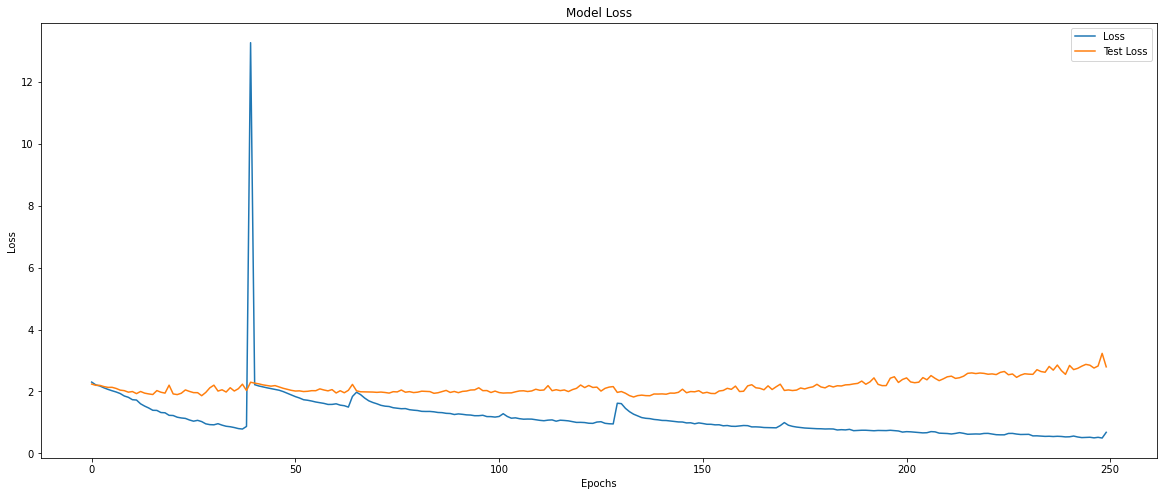

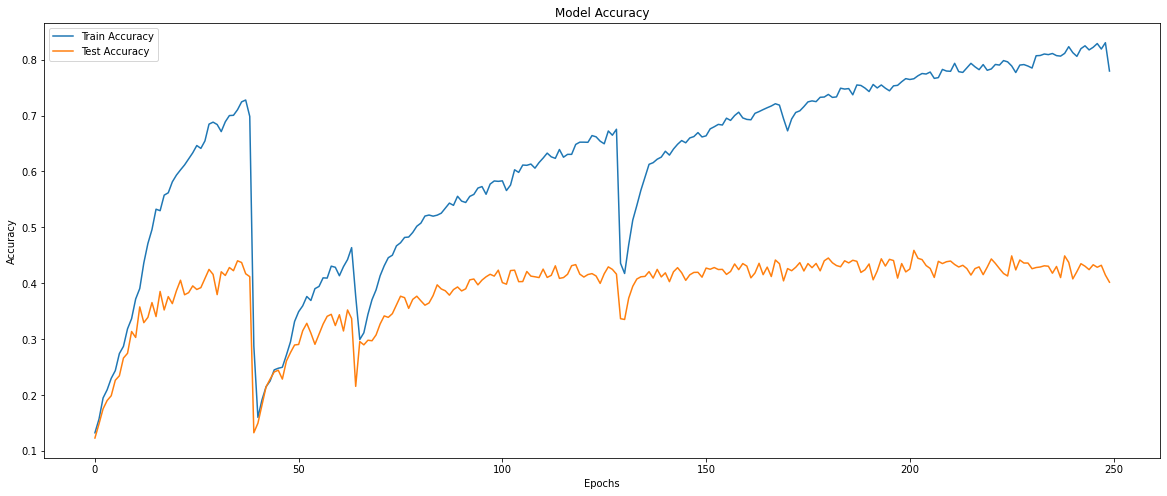

In [16]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [17]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[184   7  64  22  41  16  66  14  39  47]
 [  6  94   4   5  14   1   1   2   3  91]
 [ 35  11 238  69  13  10  20   1  21  82]
 [ 21  10  89 231  25   7  18   4  45  50]
 [ 23  24  19  62 176  16  31  50  29  70]
 [158   2   5  44  21 171   4  24   4  50]
 [  8   0  20  20   8   0 103   0   9  16]
 [ 33  17  13  20 177  10   6 122  15  39]
 [ 43  29  45  75  18   7   1   1 132  42]
 [ 39  23  71  61  16   7   4   7  21 251]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.33      0.37      0.35       500
           1       0.43      0.43      0.43       221
           2       0.42      0.48      0.45       500
           3       0.38      0.46      0.42       500
           4       0.35      0.35      0.35       500
           5       0.70      0.35      0.47       483
           6       0.41      0.56      0.47       184
           7       0.54      0.27      0.36       452
           8       0.42      0.